<a href="https://colab.research.google.com/github/Miftahul93/Machine-Learning-pemula-Dicoding/blob/main/Lat_ML_pemula_SKLearn_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Memasang drive ke notebook google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Melihat daftar dataset di folder dataset ML-Dicoding
!ls "gdrive/MyDrive/Dataset ML-Dicoding"

 ML-iris.zip
'ML-Mall Customer Segmentation Data.zip'
 ML-messy-vs-clean-room.zip
'ML-Pima Indians Diabetes Database.zip'
'ML-Salary data - Simple linear regression.zip'
 ML-Social_Network_Ads.zip
 ML-Submission-rockpaperscissors.zip
'Submission_ML_Dicoding_Miftahul Ulum.zip'


In [3]:
# Unzip
import os
import zipfile

local_zip = 'gdrive/MyDrive/Dataset ML-Dicoding/ML-Mall Customer Segmentation Data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
# Import Librari yang dibutuhkan
import pandas as pd


Pada cell pertama, kita ubah file csv kita ke dalam dataframe pandas dan menampilkan 5 baris pertama dari dataframe. 

In [5]:
df = pd.read_csv('Mall_Customers.csv') # Membaka file 
df.head() # Melihat isi dataset 5 baris pertama

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Kemudian kita akan melakukan sedikit preprocessing yaitu mengubah nama kolom agar lebih seragam. Lalu kolom gender adalah kolom kategorik, maka kita akan mengubah data tersebut menjadi data numerik.

In [6]:
# Ubah nama kolom
df = df.rename(columns={'Gender' : 'gender', 'Age' : 'age',
                        'Annual Income (k$)' : 'annual_income',
                        'Spending Score (1-100)' : 'spending_score'})

# Ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# Tampilkan data yang sudah di preprocess
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Di tahap selanjutnya kita akan mengimpor K-Means. Di tahap ini juga kita akan menghilangkan kolom Customer ID dan gender karena kurang relevan untuk proses clustering. Selanjutnya kita akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11.

In [7]:
from sklearn.cluster import KMeans

# Menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

# Membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_) 

Jalankan kode di bawah untuk membuat plot dari inersia setiap K berbeda. Sesuai plot di bawah, kita bisa melihat bahwa elbow berada di nilai K sama dengan 5, di mana penurunan inersia tidak lagi signifikan setelah nilai K sama dengan 5. Jangan lupa mengimpor library yang dibutuhkan untuk membuat plot ya.

Text(0, 0.5, 'Inertia')

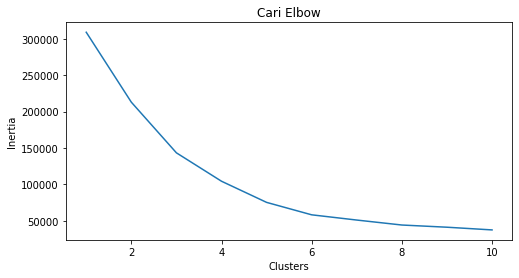

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Terakhir kita bisa melatih kembali K-Means dengan jumlah K yang didapat dari metode Elbow. Lalu kita bisa membuat plot hasil pengklasteran K-Means dengan menjalankan kode di bawah.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


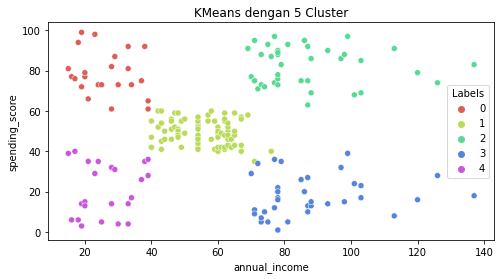

In [12]:
import seaborn as sns

# Membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# Menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# Membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()